In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import databaseconfig as cfg

In [2]:
#Connection to Postgres database
engine = create_engine(f'postgresql://{cfg.mysql["user"]}:{cfg.mysql["password"]}@{cfg.mysql["host"]}:5432/{cfg.mysql["db"]}')
conn = engine.connect()

In [3]:
#Create DataFrame from Amazon_Review_Ratings table in the Database
Amazon_Review_Ratings_df = pd.read_sql_table('amazon_review_ratings', engine)

In [4]:
# Create a query and DataFrame to store average ratings by Item Name
query = "SELECT itemname, AVG(rating) as rating, AVG(itemprice) as itemprice FROM Amazon_Review_Ratings GROUP BY itemname;"
Avg_Ratings_by_ItemName = pd.read_sql_query(query,conn)

In [5]:
Avg_Ratings_by_ItemName

,itemname,rating,itemprice
0,Apple iPhone 7 Plus 256GB Unlocked GSM 4G LTE ...,4.0,354.99
1,Samsung Galaxy J7 2018 (16GB) J737A - 5.5 HD D...,4.0,209.99
2,Google Pixel 2 GSM/CDMA Google Unlocked (Clear...,4.0,338.99
3,Sony Xperia XZ Premium - Unlocked Smartphone -...,4.0,495.00
4,"Xiaomi Mi 9 Lite 64GB + 6GB RAM, 6.39” AMOLED ...",5.0,248.00
...,...,...,...
56,"Xiaomi Mi 8 Pro (128GB, 8GB RAM) with In-Scree...",4.0,293.99
57,Moto G - Verizon Prepaid Phone (Verizon Prepai...,4.0,64.99
58,Samsung Galaxy S7 Edge G935A 32GB Gold - Unloc...,4.0,207.99
59,Samsung Galaxy S8 - Unlocked - Midnight Black ...,4.0,264.99


In [6]:
Top_Items = Avg_Ratings_by_ItemName.sort_values('rating', ascending=False).head(25)
Top_Items

,itemname,rating,itemprice
60,Samsung Galaxy S8 SM-G950UZSAVZW - Verizon - C...,5.0,289.95
13,Xiaomi Mi Note 10 128GB 108MP Penta Camera 6.4...,5.0,486.57
29,"Motorola Moto E6 Smartphone with 16GB Memory, ...",5.0,99.99
33,Motorola Moto E5 Cruise Unlocked 4G LTE (Crick...,5.0,116.70
4,"Xiaomi Mi 9 Lite 64GB + 6GB RAM, 6.39” AMOLED ...",5.0,248.00
35,"Apple iPad Air MF003LL/A (32GB, Wi-Fi + AT&T, ...",5.0,166.19
7,Motorola Moto Z3 Play 32GB XT1929-3 Deep Indig...,5.0,149.99
31,Samsung Galaxy Note8 Certified Pre-Owned Facto...,5.0,399.99
18,Samsung Galaxy Note 10 SM-N970F/DS 256GB 8GB R...,5.0,799.99
52,"Apple iPad mini 4 (32GB, Wi-Fi + Cellular, Spa...",5.0,249.99


In [7]:
Top_Items.to_csv("Top_ratings.csv", index=False)

In [13]:
# Create a query and DataFrame to display average ratings by Brand Name
query = "SELECT brandname, AVG(rating) as rating FROM Amazon_Review_Ratings GROUP BY brandname;"
Avg_Ratings_by_BrandName = pd.read_sql_query(query,conn)

In [14]:
Avg_Ratings_by_BrandName

,brandname,rating
0,Sony,3.461538
1,Samsung,3.898305
2,HUAWEI,4.000000
3,Motorola,3.853333
4,Xiaomi,4.428571
5,Nokia,3.615385
6,Google,4.047619
7,Apple,4.277778


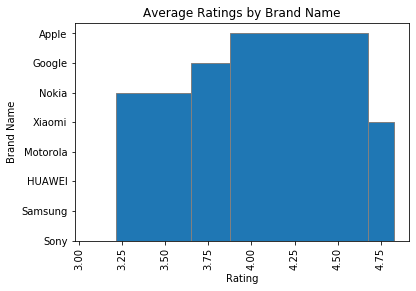

In [16]:
# Create Bar Chart of Avg_Ratings_by_BrandName
plt.bar(Avg_Ratings_by_BrandName["rating"],Avg_Ratings_by_BrandName["brandname"],edgecolor="grey")
plt.xticks(rotation=90)
plt.xlabel("Rating")
plt.ylabel("Brand Name")
plt.title("Average Ratings by Brand Name")
plt.savefig("Bar Chart_Average Ratings by Brand Name")
plt.show()